# Importing linraries and dataframes

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
#Create a path and import dataframes
path = r'/Users/buketoztekin/Documents/Quantium/'
file_path = os.path.join(path, '2_Data', 'QVI_purchase_behaviour.csv')
df_purchase = pd.read_csv(file_path)
file_path2 = os.path.join(path, '2_Data', 'QVI_transaction_Data.xlsx')
df_transaction = pd.read_excel(file_path2)

# Data cleaning and wrangling

## Data cleaning and wrangling: df_purchase dataframe

In [13]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [15]:
df_purchase.shape

(72637, 3)

In [17]:
#Check datatypes
df_purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [19]:
#Convert the datatype to object for loyalty card number column
df_purchase['LYLTY_CARD_NBR'] = df_purchase['LYLTY_CARD_NBR'].astype(str)

In [21]:
#Check again
df_purchase.dtypes

LYLTY_CARD_NBR      object
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [27]:
#Count missing values
print(df_purchase.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [29]:
#Count duplicates
df_purchase.duplicated().sum()

0

In [31]:
#Check Unique Values for LIFESTAGE and PREMIUM_CUSTOMER
print(df_purchase['LIFESTAGE'].unique())
print(df_purchase['PREMIUM_CUSTOMER'].unique())

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
['Premium' 'Mainstream' 'Budget']


## Data cleaning and wrangling: df_transaction dataframe

In [49]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [51]:
df_transaction.shape

(264836, 8)

In [53]:
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [55]:
# Convert Excel serial number to datetime
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

# Check if it worked
print(df_transaction[['DATE']].head())

        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18


In [61]:
#Convert Loyalty Card Number to string
df_transaction['LYLTY_CARD_NBR'] = df_transaction['LYLTY_CARD_NBR'].astype(str)
df_transaction['TXN_ID'] = df_transaction['TXN_ID'].astype(str)

In [63]:
#Check for missing values
print(df_transaction.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [65]:
#Check for duplicates
df_transaction.duplicated().sum()

1

In [67]:
#Drop the duplicates
df_transaction = df_transaction.drop_duplicates()
df_transaction.duplicated().sum()

0

In [69]:
#Check numerical values descriptives
print(df_transaction['PROD_QTY'].describe())

count    264835.000000
mean          1.907308
std           0.643655
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


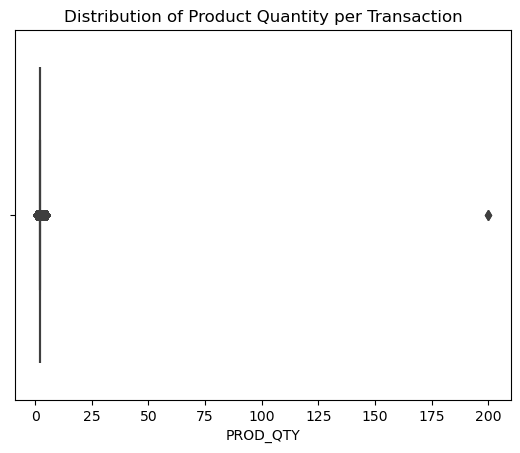

In [71]:
# Boxplot to detect product quantity
sns.boxplot(x=df_transaction['PROD_QTY'])
plt.title("Distribution of Product Quantity per Transaction")

# Show the plot
plt.show()

##### # Since the box plot reveals extreme values reaching 200, I will investigate how many values exceed 10. This will help determine whether these high values are legitimate data points or potential errors. By creating a separate dataframe for values above 10, I can analyze them further and decide whether they should be kept, transformed, or removed based on their context and impact on the dataset.

In [76]:
#Create a bulk_purchase dataframe with purchase quantity above 10
bulk_purchase = df_transaction[df_transaction['PROD_QTY'] > 10] 
print(bulk_purchase)

            DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226         226000  226201         4   
69763 2019-05-20        226         226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


##### These two extreme values (200 units) appear to be significant outliers in the dataset. Both transactions involve the same store (226), the same product (Dorito Corn Chip Supreme 380g), and the same total sales amount (650.0). Given that they are identical in multiple attributes, these could indicate a bulk purchase, a data entry error, or a special transaction (e.g., a promotional or wholesale purchase). Further investigation may be needed to confirm whether these values should be retained or adjusted, depending on the business context.

In [82]:
#Check unique product names
print(df_transaction['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [84]:
df_transaction['PROD_NAME'].nunique()

114

## Merging two dataframes

In [93]:
df_merged = df_purchase.merge(df_transaction, on='LYLTY_CARD_NBR', how='inner')

In [95]:
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [97]:
#Count missing values
print(df_merged.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64


In [99]:
df_merged.duplicated().sum()

0

In [101]:
df_merged.shape

(264835, 10)

## Column Derivations

### Derive PACK_SIZE column from PROD_NAME


In [105]:
import re

# Function to extract pack size
def extract_pack_size(prod_name):
    match = re.search(r'(\d{2,3})[gG]', prod_name)  # Looks for a number followed by 'g'
    return int(match.group(1)) if match else None  # Convert to integer

# Apply function to create a new 'PACK_SIZE' column
df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].apply(extract_pack_size)

# Check if it worked
print(df_merged[['PROD_NAME', 'PACK_SIZE']].head())

                                PROD_NAME  PACK_SIZE
0  Natural Chip        Compny SeaSalt175g        175
1   Red Rock Deli Chikn&Garlic Aioli 150g        150
2   Grain Waves Sour    Cream&Chives 210G        210
3  Natural ChipCo      Hony Soy Chckn175g        175
4          WW Original Stacked Chips 160g        160


### Derive BRAND column from PROD_NAME

In [108]:
# Extract first word as brand name
df_merged['BRAND'] = df_merged['PROD_NAME'].apply(lambda x: x.split()[0])

# Check results
print(df_merged[['PROD_NAME', 'BRAND']].head(50))

                                   PROD_NAME       BRAND
0     Natural Chip        Compny SeaSalt175g     Natural
1      Red Rock Deli Chikn&Garlic Aioli 150g         Red
2      Grain Waves Sour    Cream&Chives 210G       Grain
3     Natural ChipCo      Hony Soy Chckn175g     Natural
4             WW Original Stacked Chips 160g          WW
5                         Cheetos Puffs 165g     Cheetos
6   Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
7        RRD SR Slow Rst     Pork Belly 150g         RRD
8           Doritos Cheese      Supreme 330g     Doritos
9                   Doritos Mexicana    170g     Doritos
10   Old El Paso Salsa   Dip Tomato Med 300g         Old
11     GrnWves Plus Btroot & Chilli Jam 180g     GrnWves
12   Old El Paso Salsa   Dip Tomato Med 300g         Old
13  Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
14   Smiths Crinkle Cut  Chips Barbecue 170g      Smiths
15          Doritos Cheese      Supreme 330g     Doritos
16  Kettle Sensations   Camembe

In [110]:
# Get unique brand names in df_merged
unique_brands = df_merged['BRAND'].unique()

# Display the unique brand names
print(unique_brands)

['Natural' 'Red' 'Grain' 'WW' 'Cheetos' 'Infuzions' 'RRD' 'Doritos' 'Old'
 'GrnWves' 'Smiths' 'Kettle' 'CCs' 'Tostitos' 'Cobs' 'Burger' 'Woolworths'
 'Thins' 'Tyrrells' 'Smith' 'Cheezels' 'Twisties' 'Sunbites' 'Snbts'
 'Pringles' 'French' 'Infzns' 'Dorito' 'NCC']


In [112]:
# Standardize brand names
df_merged['BRAND'] = df_merged['BRAND'].replace({
    'Infzns': 'Infuzions',
    'RRD': 'Red Rock Deli',
    'Red': 'Red Rock Deli',
    'WW': 'Woolworths',
    'GrnWves': 'Grain Waves',
    'Grain': 'Grain Waves',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'NCC': 'Natural Chip Company',
    'Natural': 'Natural Chip Company',
    'Natural Chip Co': 'Natural Chip Company',
    'Snbts': 'Sunbites',
    'French': 'French Fries',
})

# Check unique brands after standardization
print(df_merged['BRAND'].unique())

['Natural Chip Company' 'Red Rock Deli' 'Grain Waves' 'Woolworths'
 'Cheetos' 'Infuzions' 'Doritos' 'Old' 'Smiths' 'Kettle' 'CCs' 'Tostitos'
 'Cobs' 'Burger' 'Thins' 'Tyrrells' 'Cheezels' 'Twisties' 'Sunbites'
 'Pringles' 'French Fries']


### Creating a new dataframe without the 2 outliers / bulk purchases

##### After deriving new columns and standardizing brand names, I will create a new dataframe that excludes bulk purchases. Since the data analysis focuses on typical consumer behavior, removing these bulk transactions ensures that the insights are not skewed by unusually large purchases that do not reflect standard shopping patterns.









In [117]:
df_merged['BULK_PURCHASE'] = df_merged['PROD_QTY'].apply(lambda x: 'YES' if x > 10 else 'NO')

In [119]:
df_bulk = df_merged[df_merged['BULK_PURCHASE'] == 'YES']
df_normal = df_merged[df_merged['BULK_PURCHASE'] == 'NO']

In [121]:
df_normal.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,BULK_PURCHASE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Company,NO
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red Rock Deli,NO
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,Grain Waves,NO
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural Chip Company,NO
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,Woolworths,NO


In [123]:
df_bulk.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,BULK_PURCHASE
221624,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,YES
221625,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,YES


# Exploratory analysis (EDA)

In [128]:
#Check number of unique customers, stores, products, customer segments, and premium segments
print("Unique Customers:", df_normal['LYLTY_CARD_NBR'].nunique())
print("Unique Stores:", df_normal['STORE_NBR'].nunique())
print("Unique Products:", df_normal['PROD_NAME'].nunique())
print("Customer Segments:", df_normal['LIFESTAGE'].unique())
print("Premium Segments:", df_normal['PREMIUM_CUSTOMER'].unique())

Unique Customers: 72636
Unique Stores: 272
Unique Products: 114
Customer Segments: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
Premium Segments: ['Premium' 'Mainstream' 'Budget']


In [170]:
# Calculate total revenue
total_revenue = df_normal['TOT_SALES'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 1933109.0


In [210]:
# Calculate yearly revenue
yearly_revenue = df_normal.groupby(df_normal['DATE'].dt.year)['TOT_SALES'].sum()
print("Yearly Revenue:\n", yearly_revenue)

Yearly Revenue:
 DATE
2018    976435.15
2019    956673.85
Name: TOT_SALES, dtype: float64


In [198]:
#Count of total transactions
print(f"Total Transactions: {df_normal['TXN_ID'].nunique()}")

Total Transactions: 263125


In [200]:
print(f"Average Spend per Transaction: ${df_normal['TOT_SALES'].mean():.2f}")

Average Spend per Transaction: $7.30


In [206]:
df_normal[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,264833.000000,264833.000000
mean,1.905812,7.299351
std,0.343437,2.527244
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,5.000000,29.500000


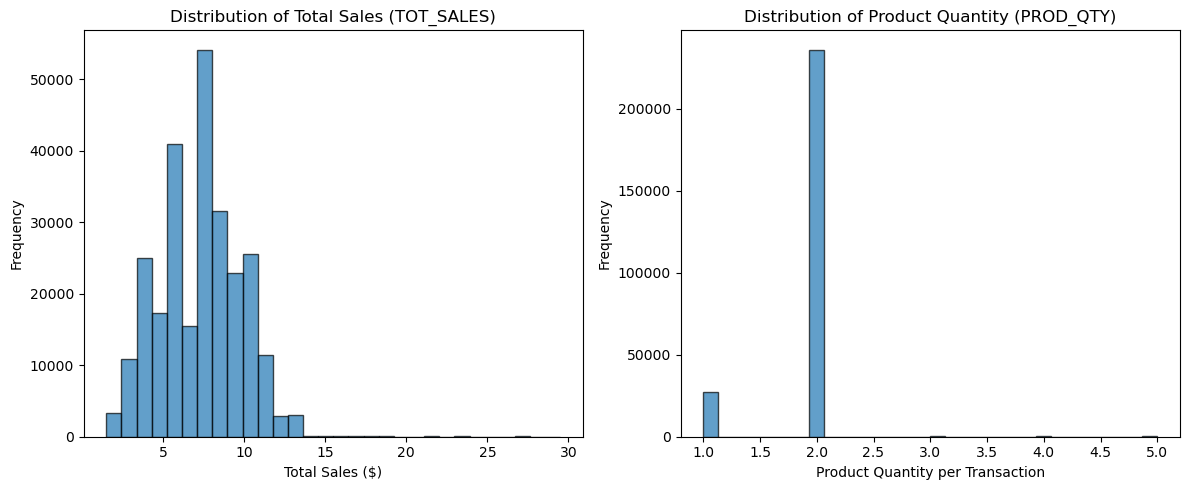

In [132]:
# Create histograms for TOT_SALES and PROD_QTY
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for TOT_SALES
axes[0].hist(df_normal['TOT_SALES'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Total Sales (TOT_SALES)')
axes[0].set_xlabel('Total Sales ($)')
axes[0].set_ylabel('Frequency')

# Histogram for PROD_QTY
axes[1].hist(df_normal['PROD_QTY'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Product Quantity (PROD_QTY)')
axes[1].set_xlabel('Product Quantity per Transaction')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

#### Observations from the Histograms:
1. Distribution of Total Sales (Left Histogram)
The total sales per transaction mostly fall within the range of $3 to $15, with a peak around $5 to $10.
There are very few transactions above $20, suggesting that most purchases are of lower to mid-value items.
The distribution appears slightly right-skewed, indicating a small number of higher-value transactions.

2. Distribution of Product Quantity per Transaction (Right Histogram)
Most transactions involve purchasing 2 units of a product.
There are very few transactions with 1 unit or more than 2 units, suggesting that buying in pairs is a common trend.
Almost no transactions exceed 5 units, reinforcing that bulk purchases are rare in this dataset.


Key Takeaways
Customers generally spend between $3 and $15 per transaction.
Most transactions involve purchasing exactly 2 units, which might indicate multi-buy promotions or consumer habits favoring purchasing in pairs.

## Customer Profiles: Count & Spending by Lifestage and Premium Status

### Lifestage

In [162]:
#Check the count of unique customers in each LIFESTAGE
print(df_purchase[['LIFESTAGE']].value_counts())

LIFESTAGE             
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64


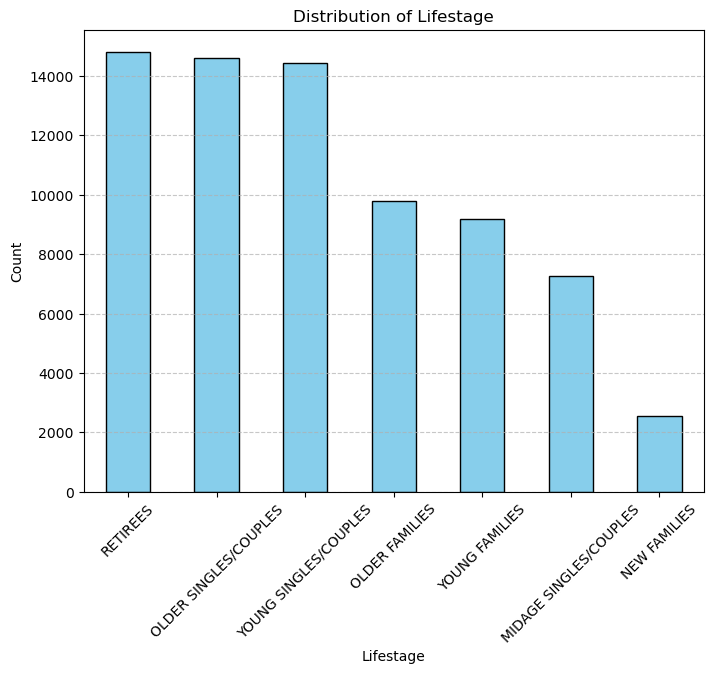

In [258]:
# Create the bar chart
plt.figure(figsize=(8, 6))
df_purchase['LIFESTAGE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.title('Distribution of Lifestage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Customer distribution and by lifestage
The largest groups are Retirees (14,805), Older Singles/Couples (14,609), and Young Singles/Couples (14,441), indicating that these segments make up a significant portion of the customer base.

In contrast, New Families (2,549) represent the smallest group, suggesting that they are a niche segment or less engaged in purchases. Midage Singles/Couples (7,275) and Young Families (9,178) fall in the mid-range, while Older Families (9,780) are slightly larger but still notably smaller than the top three segments.


In [250]:
# Calculate the mean spend per transaction for each LIFESTAGE segment
avg_spend_by_lifestage = df_normal.groupby('LIFESTAGE')['TOT_SALES'].mean()

# Display results
print(avg_spend_by_lifestage)

LIFESTAGE
MIDAGE SINGLES/COUPLES    7.357678
NEW FAMILIES              7.289124
OLDER FAMILIES            7.253307
OLDER SINGLES/COUPLES     7.386849
RETIREES                  7.364325
YOUNG FAMILIES            7.252709
YOUNG SINGLES/COUPLES     7.158515
Name: TOT_SALES, dtype: float64


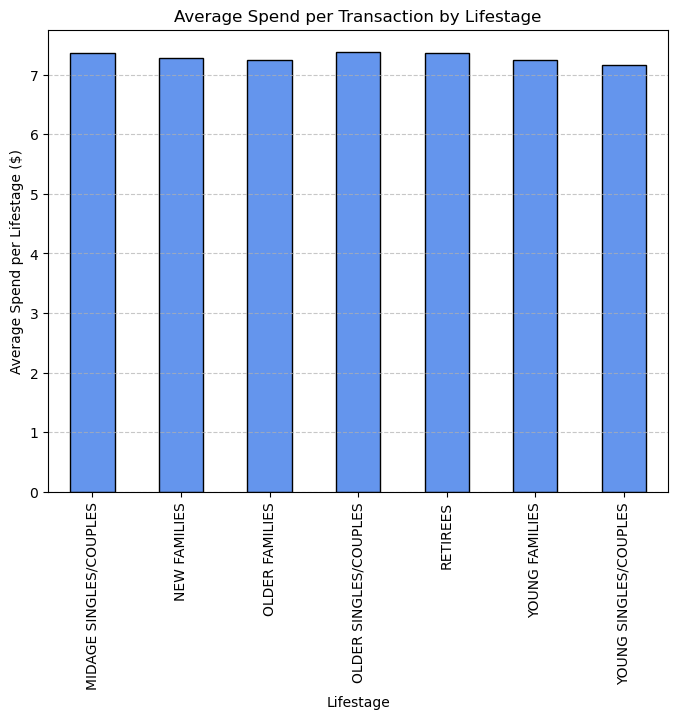

In [262]:
# Create bar plot
plt.figure(figsize=(8, 6))
avg_spend_by_lifestage.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Labels and title
plt.xlabel('Lifestage')
plt.ylabel('Average Spend per Lifestage ($)')
plt.title('Average Spend per Transaction by Lifestage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


### Premium status

In [160]:
#Check the count of unique customers in each segment
print(df_purchase[['PREMIUM_CUSTOMER']].value_counts())

PREMIUM_CUSTOMER
Mainstream          29245
Budget              24470
Premium             18922
Name: count, dtype: int64


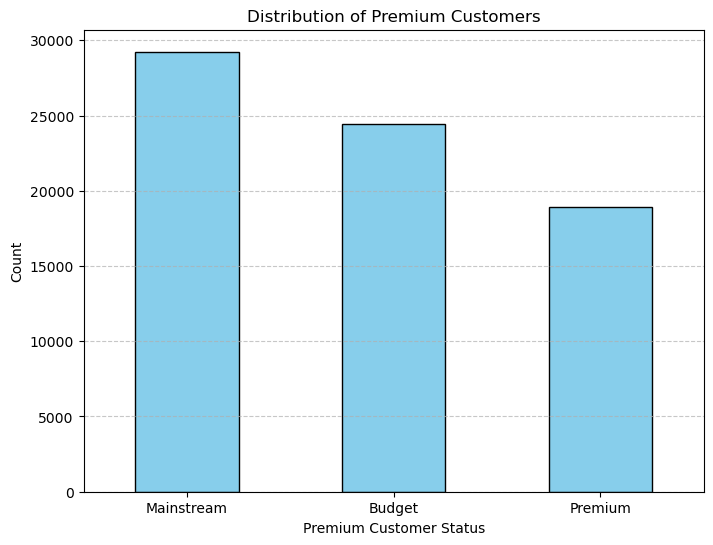

In [148]:
# Create the bar chart
plt.figure(figsize=(8, 6))
df_purchase['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Premium Customer Status')
plt.ylabel('Count')
plt.title('Distribution of Premium Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [236]:
# Calculate the mean spend per transaction for each PREMIUM_CUSTOMER segment
avg_spend_by_premium = df_normal.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()

# Display results
print(avg_spend_by_premium)

PREMIUM_CUSTOMER
Budget        7.258838
Mainstream    7.361106
Premium       7.263129
Name: TOT_SALES, dtype: float64


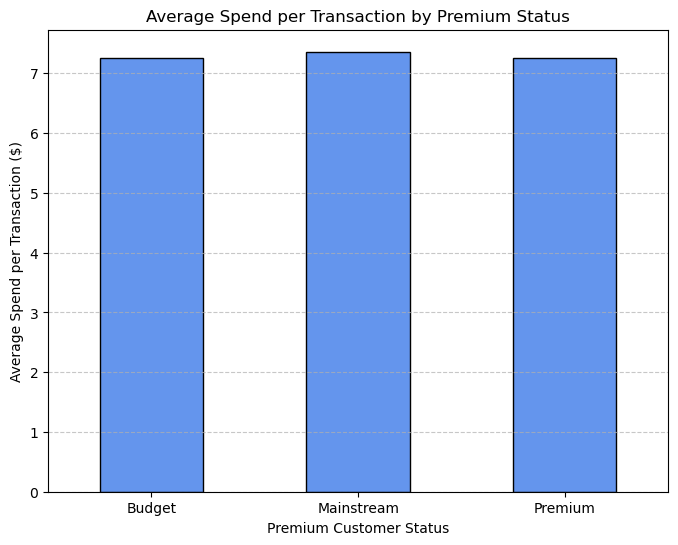

In [238]:
# Create bar plot
plt.figure(figsize=(8, 6))
avg_spend_by_premium.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Labels and title
plt.xlabel('Premium Customer Status')
plt.ylabel('Average Spend per Transaction ($)')
plt.title('Average Spend per Transaction by Premium Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [240]:
df_normal.groupby('PREMIUM_CUSTOMER')['TXN_ID'].count()

PREMIUM_CUSTOMER
Budget         93157
Mainstream    101988
Premium        69688
Name: TXN_ID, dtype: int64

In [246]:
df_normal.groupby('PREMIUM_CUSTOMER')['PACK_SIZE'].mean().head(10)

PREMIUM_CUSTOMER
Budget        182.181479
Mainstream    182.834520
Premium       182.153255
Name: PACK_SIZE, dtype: float64

### Products

In [181]:
# Best-selling products
df_normal.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64

### Brands

In [264]:
df_normal.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

BRAND
Kettle                  390239.8
Doritos                 240590.9
Smiths                  224654.2
Pringles                177655.5
Infuzions                99047.6
Red Rock Deli            95046.0
Old                      90785.1
Thins                    88852.5
Twisties                 81522.1
Tostitos                 79789.6
Cobs                     70569.8
Tyrrells                 51647.4
Grain Waves              51617.2
Woolworths               49343.6
Natural Chip Company     42318.0
Cheezels                 40029.9
CCs                      18078.9
Cheetos                  16884.5
Sunbites                  9676.4
French Fries              7929.0
Burger                    6831.0
Name: TOT_SALES, dtype: float64

### Stores

In [184]:
df_normal.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

STORE_NBR
226    17605.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

### Package size

In [192]:
df_normal.groupby('PACK_SIZE')['TOT_SALES'].sum()

PACK_SIZE
70       6852.0
90       9676.4
110    162765.4
125      5733.0
134    177655.5
135     26090.4
150    304288.5
160     10647.6
165    101360.6
170    146673.0
175    485431.4
180      8568.4
190     14412.9
200     16007.5
210     43048.8
220      6831.0
250     26096.7
270     55425.4
300    113330.6
330    136794.3
380     75419.6
Name: TOT_SALES, dtype: float64

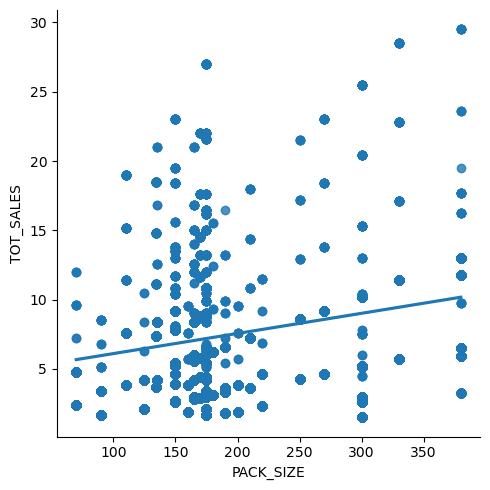

In [202]:
sns.lmplot(x = 'PACK_SIZE', y = 'TOT_SALES', data = df_normal)